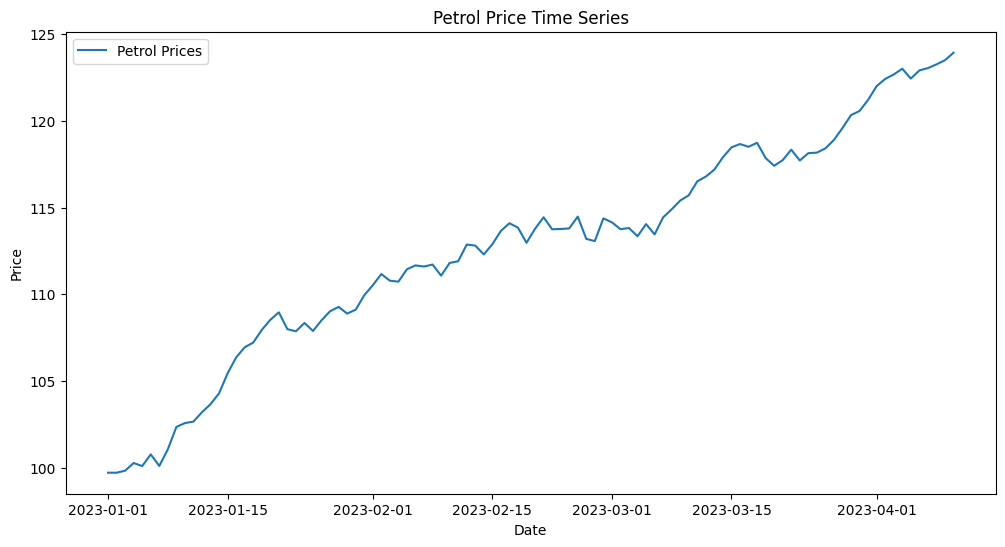


Augmented Dickey-Fuller Test:
ADF Statistic: -1.088428508070992
p-value: 0.7196643531073976
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097

Conclusion: Data is non-stationary (fail to reject H0).


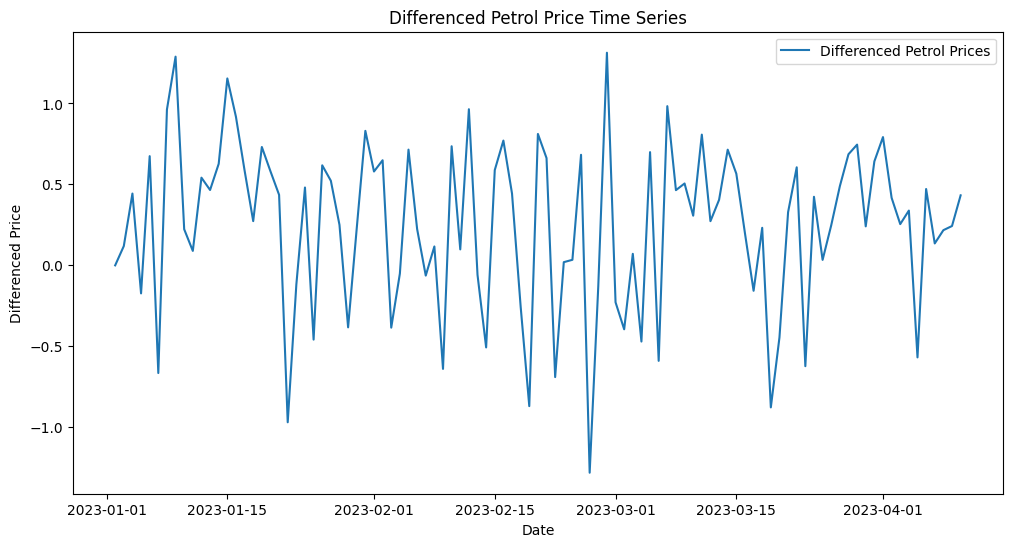


Augmented Dickey-Fuller Test:
ADF Statistic: -9.929375009401264
p-value: 2.849801023668729e-17
Critical Values:
   1%: -3.4989097606014496
   5%: -2.891516256916761
   10%: -2.5827604414827157

Conclusion: Data is stationary (reject H0).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Simulated petrol price data (or load from CSV)
dates = pd.date_range(start='2023-01-01', periods=100)
data = 100 + np.cumsum(np.random.normal(0.2, 0.5, 100))  # Trendy petrol prices
df = pd.DataFrame({'Date': dates, 'Price': data})
df.set_index('Date', inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Petrol Prices')
plt.title('Petrol Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Augmented Dickey-Fuller test for stationarity
def adf_test(series):
    result = adfuller(series)
    print("\nAugmented Dickey-Fuller Test:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("\nConclusion: Data is stationary (reject H0).")
    else:
        print("\nConclusion: Data is non-stationary (fail to reject H0).")

# Check stationarity
adf_test(df['Price'])

# Differencing if non-stationary
df['Price_Diff'] = df['Price'].diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(df['Price_Diff'], label='Differenced Petrol Prices')
plt.title('Differenced Petrol Price Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

# Check stationarity after differencing
adf_test(df['Price_Diff'].dropna())
